# Imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
from keras import models, layers, optimizers
import warnings
warnings.filterwarnings('ignore')

# Defining function to plot loss and accuracy curves

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

# Loading and preprocessing data

In [13]:
df = pd.read_csv('/content/drive/My Drive/fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [0]:
training = df[df['Usage'] == 'Training']
testing = df[df['Usage'] != 'Training']

In [15]:
data = testing['pixels'].apply(lambda x: x.split(' ')).to_numpy()
testing_data = np.zeros((len(data), len(data[0])))
for i in range(len(data)):
    testing_data[i] = np.array(data[i])

testing_data = testing_data.astype('float')
testing_data.shape

(7178, 2304)

In [17]:
data = training['pixels'].apply(lambda x: x.split(' ')).to_numpy()
training_data = np.zeros((len(data), len(data[0])))
for i in range(len(data)):
    training_data[i] = np.array(data[i])

training_data = training_data.astype('float')
training_data.shape

(28709, 2304)

In [0]:
training_data.shape = (len(training_data), 48, 48, 1)
training_labels = training['emotion'].values.astype('float')

In [0]:
testing_data.shape = (len(testing_data), 48, 48, 1)
testing_labels = testing['emotion'].values.astype('float')

# Creating Model

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)        

# Training Model

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
num_epoch = 50
training_labels = keras.utils.to_categorical(training_labels, 7)
testing_labels = keras.utils.to_categorical(testing_labels, 7)
model_info = model.fit(
        training_data, training_labels,
        epochs=num_epoch,
        validation_data=(testing_data, testing_labels))
model.save_weights("/content/drive/My Drive/model.h5")

Train on 28709 samples, validate on 7178 samples
Epoch 1/50
28709/28709 [==============================] - 14s 500us/step - loss: 2.4062 - accuracy: 0.2125 - val_loss: 1.8394 - val_accuracy: 0.2515
Epoch 2/50
28709/28709 [==============================] - 8s 269us/step - loss: 1.8274 - accuracy: 0.2480 - val_loss: 1.8023 - val_accuracy: 0.2671
Epoch 3/50
28709/28709 [==============================] - 8s 268us/step - loss: 1.7750 - accuracy: 0.2778 - val_loss: 1.7182 - val_accuracy: 0.3069
Epoch 4/50
28709/28709 [==============================] - 8s 270us/step - loss: 1.7266 - accuracy: 0.3073 - val_loss: 1.6497 - val_accuracy: 0.3653
Epoch 5/50
28709/28709 [==============================] - 8s 269us/step - loss: 1.6604 - accuracy: 0.3457 - val_loss: 1.5786 - val_accuracy: 0.3845
Epoch 6/50
28709/28709 [==============================] - 8s 273us/step - loss: 1.5956 - accuracy: 0.3776 - val_loss: 1.4747 - val_accuracy: 0.4351
Epoch 7/50
28709/28709 [==============================] - 8s 2

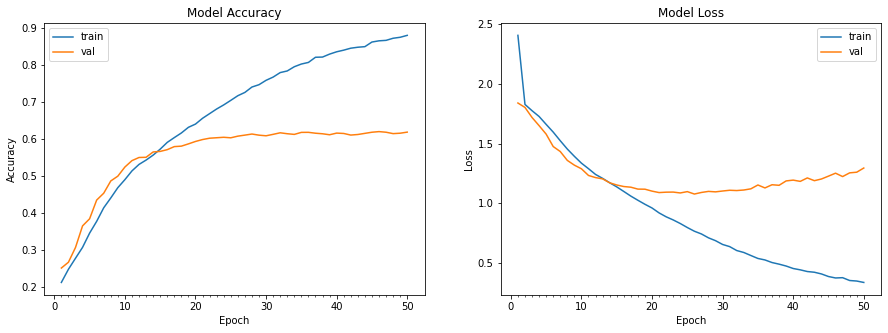

In [0]:
plot_model_history(model_info)

# Emotions will be displayed for the faces detected from the webcam feed

In [0]:
#load trained model
model.load_weights('/content/drive/My Drive/model.h5')

# prevents openCL usage and unnecessary logging messages
cv2.ocl.setUseOpenCL(False)

# dictionary mapping class labels with corresponding emotions
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# start the webcam feed
cap = cv2.VideoCapture(0)

# To find haar cascade to draw bounding box around face
facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
while True:
    # Capture frame
    ret, frame = cap.read()
    if not ret:
        break;    
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.imshow('Video', cv2.resize(frame,(640, 480),interpolation = cv2.INTER_CUBIC))
    
    # press 'q' to quit webcam feed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()